In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, train_test_split



from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor


In [91]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [92]:
df = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/train.csv').drop('id',axis = 1)
test = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/test.csv').drop('id',axis = 1)

In [93]:
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


# Bagging , Stacking 성능 차이 

### 1. Bagging

##### 부트스트랩 집계의 줄임말인 배깅은 향상된 예측을 위해 여러 모델을 결합하는 데 사용되는 앙상블 기술입니다. 배깅 기술에 대한 간략한 설명은 다음과 같습니다.


1. Dataset Sampling

    Bagging은 원래 교육 데이터 세트의 여러 하위 집합을 생성하여 시작합니다. 이는 부트스트래핑이라는 프로세스를 통해 이루어지며, 원본 데이터 세트에서 대체하여 무작위 샘플을 추출합니다. 각 하위 집합은 원래 데이터 집합과 크기가 같습니다.
    모델 교육: 각 부트스트랩 샘플에 대해 별도의 모델이 교육됩니다. 이러한 모델은 의사 결정 트리, 지원 벡터 머신 또는 신경망과 같은 모든 유형이 될 수 있습니다. 각 모델은 해당 부트스트랩 샘플에서 독립적으로 훈련됩니다.

2. 예측 조합

    모델이 훈련되면 예측이 결합되어 최종 예측을 만듭니다. 분류 작업에서는 모든 모델에서 가장 많은 표를 얻은 클래스가 최종 예측으로 선택되는 다수결 투표가 일반적으로 사용됩니다. 회귀 작업의 경우 다른 적절한 방법을 사용하여 예측을 평균화하거나 결합할 수 있습니다.

    배깅의 기본 아이디어는 모델의 다양한 앙상블을 만드는 것입니다. 각 모델은 데이터의 약간 다른 하위 집합에 대해 학습되어 가변성을 도입합니다. 배깅은 이러한 다양한 모델의 예측을 결합하여 전반적인 예측 정확도를 개선하고 과적합의 위험을 줄이는 것을 목표로 합니다.


배깅은 개별 모델의 분산이 크거나 훈련 데이터에 과적합되는 경향이 있을 때 특히 효과적입니다. 서로 다른 하위 집합에서 여러 모델을 교육함으로써 배깅은 개별 모델의 편향을 평균화하고 이상치 또는 잡음이 많은 샘플의 영향을 줄이는 데 도움이 됩니다.


전반적으로 배깅은 모델의 다양성을 활용하여 예측 성능을 향상하고 모델 견고성을 높이는 강력한 앙상블 기술입니다. 다양한 작업을 위한 기계 학습에 널리 사용되며 다양한 기본 모델로 구현하여 앙상블을 형성할 수 있습니다.

In [94]:
rf = RandomForestRegressor(n_estimators = 100)
xgb = XGBRegressor(n_estimators = 100)
lgb = LGBMRegressor(n_estimators = 100,verbose = -1)
ext = ExtraTreesRegressor(n_estimators = 100)

In [95]:
def min_max_scailing(x):
    
    min_ = np.min(x)
    max_ = np.max(x)
    
    return (x - min_)/(max_ - min_)

In [96]:
for col in df.columns[:-1]:
    
    df[col] = min_max_scailing(df[col])
    
for col in test.columns:
    
    test[col] = min_max_scailing(test[col])    

In [97]:
models = [rf,xgb,lgb,ext]

In [98]:
X,y = df.drop('yield',axis = 1), df['yield']

x_train,x_valid, y_train,y_valid = train_test_split(X,y)

In [99]:
def kfold_pred(X,y,models,splits):
    
    '''
    splits 만큼 KFold set 을 만들고 predict list 를 return 하는 함수 
    '''    
    
    cv = KFold(n_splits = splits, random_state = 42,
                shuffle = True)
    
    num_model = len(models)
    
    pred_list = [np.zeros((X.shape[0],1)) for _ in range(num_model)]    
    idx_count = [np.zeros((X.shape[0],1)) for _ in range(num_model)]
    
    for i,model in tqdm(enumerate(models)):
        
        model = model
        
        for train_idx,valid_idx in cv.split(X,y):
            
            x_train,y_train = X.iloc[train_idx], y.iloc[train_idx]
            x_valid,y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
            
            model.fit(x_train,y_train)
            
            pred_list[i][valid_idx] += model.predict(x_valid).reshape(-1,1) 
            idx_count[i][valid_idx] += 1 # 해당 valid_idx 가 Fold set 에 생성 된 경우 1 += 
            
        pred_list[i] = pred_list[i] / idx_count[i] # valid_idx가 더해진 만큼 나눠 평균치를 구함 
        
    return pred_list, y

In [100]:
def get_weights(models,pred_list,y):
    '''
    pred_list의 가중 평균을 구해 weights 를 구하는 함수 
    mse 가 낮을 수록 큰 가중치를 주도록 정규화한 reversed_Weight를 return 
    '''
    
    num_model = len(models)    
        
    weights = []
    
    for _ in range(num_model):
        
        weight = mean_squared_error(y,pred_list[_])
        
        weights.append(weight)
        
    total_weights = np.sum(weights)
    
    normalized_weights = [w / total_weights for w in weights]

    reversed_weights = [1 - norm for norm in normalized_weights]
    
    total_reversed_weights = np.sum(reversed_weights)
    
    normalized_reversed_weights = [norm_reversed / total_reversed_weights for norm_reversed in reversed_weights]
    
    return normalized_reversed_weights

In [102]:
pred_list,y = kfold_pred(x_train,y_train, models, splits = 10)
weights = get_weights(models,pred_list,y)

4it [01:05, 16.30s/it]


In [109]:
for i,w in enumerate(weights):
    
    model_name = str(models[i]).split('(')[0]
    print(f'{model_name} weight : {round(w,4)}')

RandomForestRegressor weight : 0.2495
XGBRegressor weight : 0.2501
LGBMRegressor weight : 0.2538
ExtraTreesRegressor weight : 0.2465


In [104]:
def bagging(models,pred_list,weights,y_true):
    
    '''
    weight 별로 bagging 하여 최종 예측값을 return
    '''
    
    num_model = len(models)
    
    results = np.zeros((len(y_true),1))

    for _ in range(num_model):
        results += pred_list[_] * weights[_]
                
    return results

In [105]:
num_models = len(models)

pred_list = [np.zeros((len(y),1)) for _ in range(num_models)]

for model_idx,model in enumerate(models):
    
    model = model
    
    model.fit(x_train,y_train)
    pred_list[model_idx]= (model.predict(x_valid)).reshape(-1,1) # Valid set에 대한 pred_list 생성 
    
bagging_results = bagging(models, pred_list,weights,y_valid)

### 단일 예측 모델과 앙상블 모델 비교 

In [106]:
for model_idx, pred in enumerate(pred_list):
    
    model_name = str(models[model_idx]).split('(')[0]
    score = mean_squared_error(y_valid,pred)
    print(f'{model_name} MSE : {score}')
    
print(f'앙상블 모델 MSE : {mean_squared_error(y_valid,bagging_results)}')

RandomForestRegressor MSE : 331481.2574724482
XGBRegressor MSE : 337114.301038465
LGBMRegressor MSE : 310430.219362125
ExtraTreesRegressor MSE : 347605.87697873905
앙상블 모델 MSE : 316233.331735369


Text(0.5, 0.98, 'The diffrent between Single model & Bagging model')

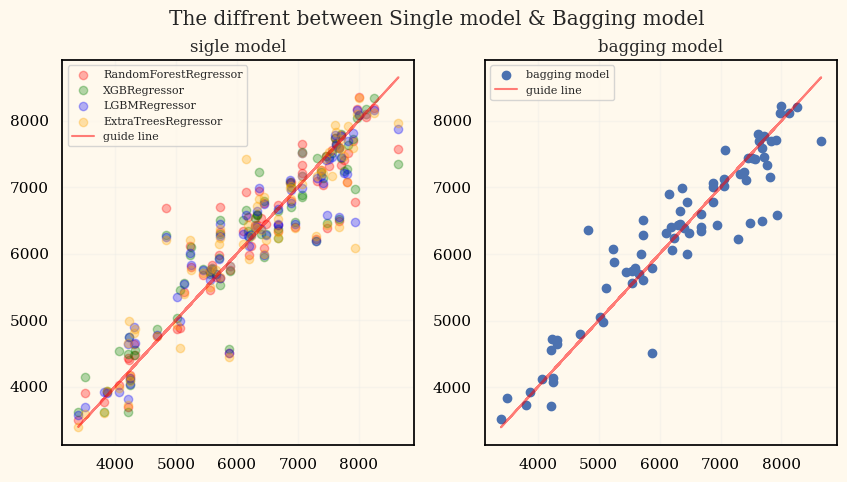

In [107]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,5))
ax = ax.flatten()

colors = ['red','green','blue','orange']

for i,pred in enumerate(pred_list):
    
    model_name = str(models[i]).split('(')[0]
    
    ax[0].scatter(y_valid[::50],pred[::50],
                c = colors[i],  alpha = 0.3,
                label = model_name)
ax[0].set_title('sigle model')
ax[0].plot(y_valid[::50],y_valid[::50], c = 'red', alpha = 0.5,
            label = 'guide line')
ax[0].legend(fontsize = 8)

ax[1].scatter(y_valid[::50],bagging_results[::50],
                label = 'bagging model')
ax[1].set_title('bagging model')
ax[1].plot(y_valid[::50],y_valid[::50], c = 'red', alpha = 0.5,
            label = 'guide line')
ax[1].legend(fontsize = 8)


fig.suptitle('The diffrent between Single model & Bagging model')